# Exploration

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [17]:
with open('Data/kddcup.names.txt', 'r') as file:
    # Read the content of the file
    file_content = file.read()
    # Print the content
    print(file_content)

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [18]:
# Getting columns
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())
    
columns.append('target')
print(columns)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target']


In [19]:
with open("Data/training_attack_types.txt",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [20]:
attacks_types = {
'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

# Building the dataframe

In [21]:
df = pd.read_csv("Data/kddcup.data_10_percent_corrected.csv", names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,normal


In [22]:
df.shape

(494021, 43)

In [23]:
df['target'].value_counts()

target
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

In [24]:
df['Attack Type'].value_counts()

Attack Type
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [26]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df.describe(include='object')

,protocol_type,service,flag,target,Attack Type
count,494021,494021,494021,494021,494021
unique,3,66,11,23,5
top,icmp,ecr_i,SF,smurf.,dos
freq,283602,281400,378440,280790,391458


# Pre-processing

In [28]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [29]:
# Number of duplicate rows
df.duplicated().sum()

348435

In [30]:
df.drop_duplicates(inplace=True)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,normal


In [31]:
df.shape

(145586, 43)

In [32]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['flag', 'protocol_type', 'service']

# Visualisation

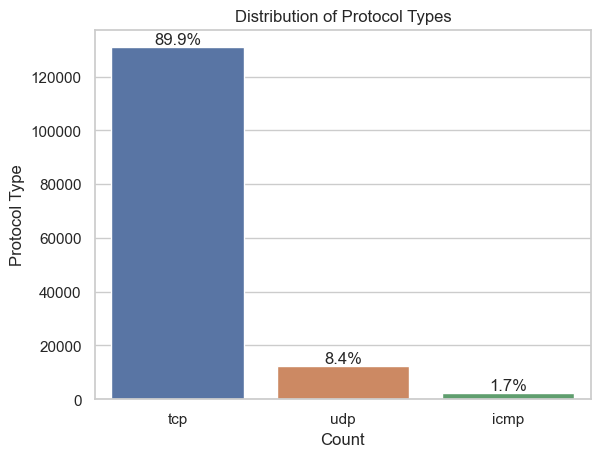

In [33]:
%matplotlib inline
sns.set(style="whitegrid")

# Create the countplot
ax = sns.countplot(data=df, x="protocol_type")

# Set plot labels and title
plt.xlabel("Count")
plt.ylabel("Protocol Type")
plt.title("Distribution of Protocol Types")

# Add value counts on top of each bar
total = len(df["protocol_type"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

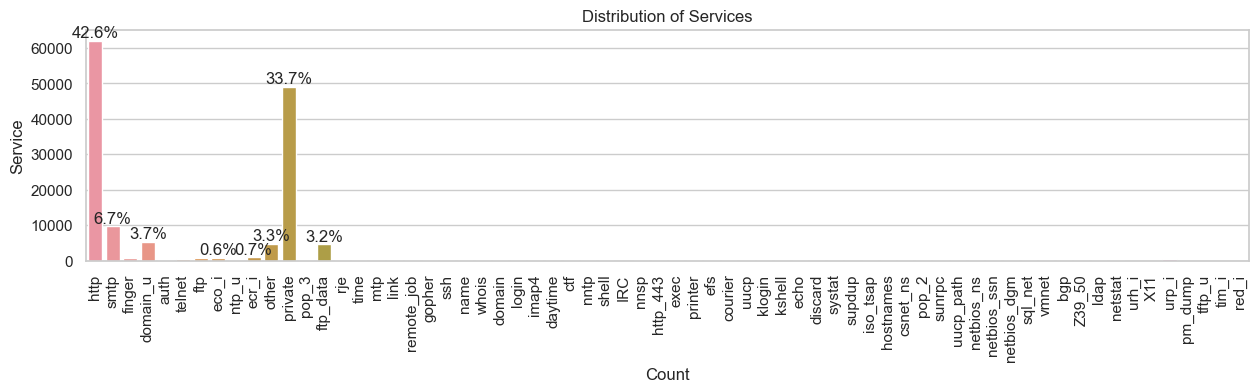

In [34]:
plt.figure(figsize=(15, 3))
sns.set(style="whitegrid")

# Create the countplot
ax = sns.countplot(data=df, x="service")

plt.xlabel("Count")
plt.ylabel("Service")
plt.title("Distribution of Services")
plt.xticks(rotation=90)

# Add value counts on top of each bar
total = len(df["service"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    if float(percentage[:-1]) > 0.5: ax.annotate(percentage, (x, y), ha='center', va='bottom')

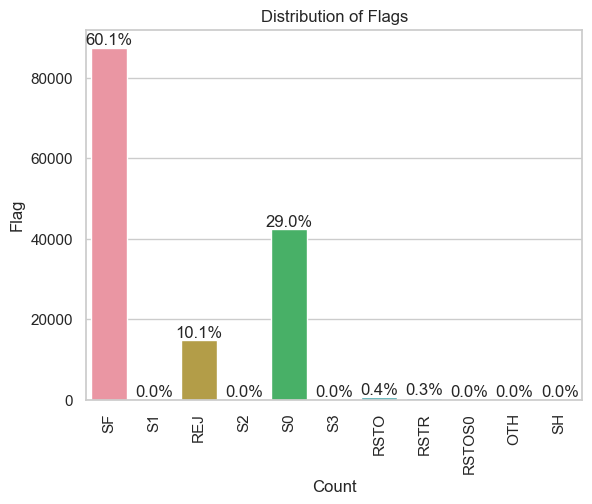

In [35]:
sns.set(style="whitegrid")

# Create the countplot
ax = sns.countplot(data=df, x="flag")

plt.xlabel("Count")
plt.ylabel("Flag")
plt.title("Distribution of Flags")
plt.xticks(rotation=90)

# Add value counts on top of each bar
total = len(df["logged_in"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

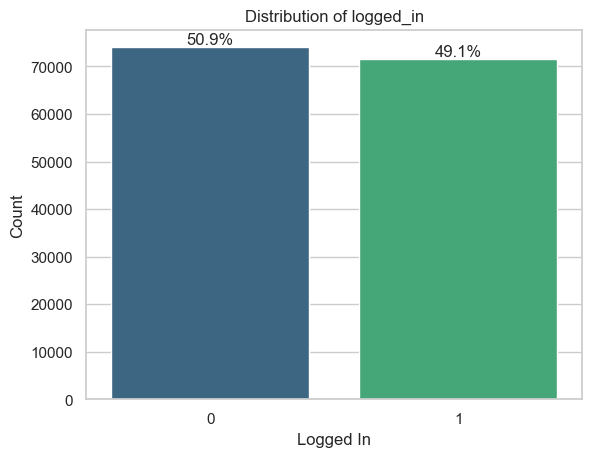

In [36]:
sns.set(style="whitegrid")

# Create the countplot
ax = sns.countplot(data=df, x="logged_in", palette="viridis")  # Using a different color palette

# Set plot labels and title
plt.xlabel("Logged In")
plt.ylabel("Count")
plt.title("Distribution of logged_in")

# Add value counts on top of each bar
total = len(df["logged_in"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

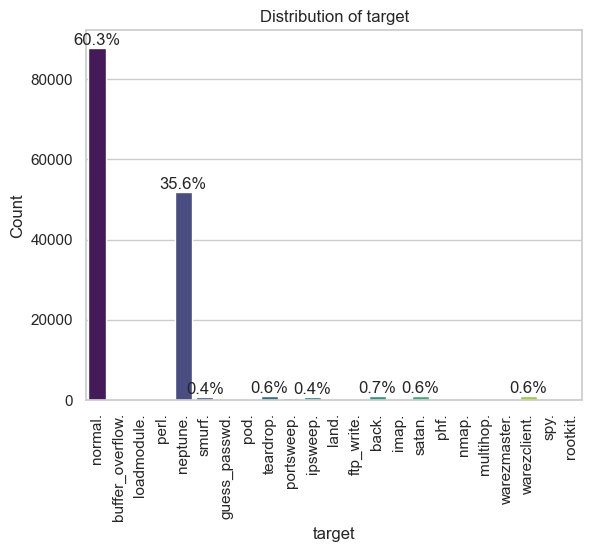

In [37]:
sns.set(style="whitegrid")

# Create the countplot
ax = sns.countplot(data=df, x="target", palette="viridis")  # Using a different color palette

# Set plot labels and title
plt.xlabel("target")
plt.ylabel("Count")
plt.title("Distribution of target")
plt.xticks(rotation=90)

# Add value counts on top of each bar
total = len(df["target"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    if float(percentage[:-1]) > 0.3: ax.annotate(percentage, (x, y), ha='center', va='bottom')

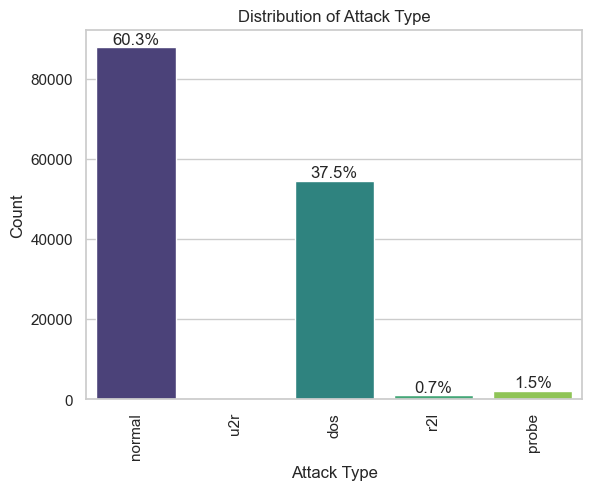

In [38]:
sns.set(style="whitegrid")

# Create the countplot
ax = sns.countplot(data=df, x="Attack Type", palette="viridis")  # Using a different color palette

# Set plot labels and title
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.title("Distribution of Attack Type")
plt.xticks(rotation=90)

# Add value counts on top of each bar
total = len(df["Attack Type"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    if float(percentage[:-1]) > 0.3: ax.annotate(percentage, (x, y), ha='center', va='bottom')

In [39]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

# DATA CORRELATION

In [40]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['protocol_type', 'service', 'flag', 'target', 'Attack Type'], dtype='object')

In [41]:
from sklearn.preprocessing import LabelEncoder

le_protocol = LabelEncoder()
col = 'protocol_type'
df[col + '_encoded'] = le_protocol.fit_transform(df[col])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type,protocol_type_encoded
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.,normal,1
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,normal,1
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal,1
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal,1
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,normal,1
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,normal,1
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,normal,1
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,normal,1


In [42]:
from sklearn.preprocessing import LabelEncoder

le_service = LabelEncoder()
col = 'service'
df[col + '_encoded'] = le_service.fit_transform(df[col])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type,protocol_type_encoded,service_encoded
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.11,0.00,0.00,0.00,0.0,0.0,normal.,normal,1,22
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.05,0.00,0.00,0.00,0.0,0.0,normal.,normal,1,22
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal,1,22
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal,1,22
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.02,0.00,0.00,0.00,0.0,0.0,normal.,normal,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,0.01,0.05,0.00,0.01,0.0,0.0,normal.,normal,1,22
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,0.17,0.05,0.00,0.01,0.0,0.0,normal.,normal,1,22
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,0.06,0.05,0.06,0.01,0.0,0.0,normal.,normal,1,22
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,0.04,0.05,0.04,0.01,0.0,0.0,normal.,normal,1,22


In [43]:
from sklearn.preprocessing import LabelEncoder

le_flag = LabelEncoder()
col = 'flag'
df[col + '_encoded'] = le_flag.fit_transform(df[col])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type,protocol_type_encoded,service_encoded,flag_encoded
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,normal.,normal,1,22,9
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,normal.,normal,1,22,9
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,normal.,normal,1,22,9
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,normal.,normal,1,22,9
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,normal.,normal,1,22,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,0.05,0.00,0.01,0.0,0.0,normal.,normal,1,22,9
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,0.05,0.00,0.01,0.0,0.0,normal.,normal,1,22,9
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,0.05,0.06,0.01,0.0,0.0,normal.,normal,1,22,9
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,0.05,0.04,0.01,0.0,0.0,normal.,normal,1,22,9


In [44]:
from sklearn.preprocessing import LabelEncoder

le_target = LabelEncoder()
col = 'target'
df[col + '_encoded'] = le_target.fit_transform(df[col])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type,protocol_type_encoded,service_encoded,flag_encoded,target_encoded
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.00,0.00,0.0,0.0,normal.,normal,1,22,9,11
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.00,0.00,0.0,0.0,normal.,normal,1,22,9,11
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.00,0.00,0.0,0.0,normal.,normal,1,22,9,11
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.00,0.00,0.0,0.0,normal.,normal,1,22,9,11
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.00,0.00,0.0,0.0,normal.,normal,1,22,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,0.00,0.01,0.0,0.0,normal.,normal,1,22,9,11
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,0.00,0.01,0.0,0.0,normal.,normal,1,22,9,11
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,0.06,0.01,0.0,0.0,normal.,normal,1,22,9,11
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,0.04,0.01,0.0,0.0,normal.,normal,1,22,9,11


In [45]:
from sklearn.preprocessing import LabelEncoder

le_Attack_type = LabelEncoder()
col = 'Attack Type'
df[col + '_encoded'] = le_Attack_type.fit_transform(df[col])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type,protocol_type_encoded,service_encoded,flag_encoded,target_encoded,Attack Type_encoded
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.00,0.0,0.0,normal.,normal,1,22,9,11,1
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.00,0.0,0.0,normal.,normal,1,22,9,11,1
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.00,0.0,0.0,normal.,normal,1,22,9,11,1
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.00,0.0,0.0,normal.,normal,1,22,9,11,1
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.00,0.0,0.0,normal.,normal,1,22,9,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,0.01,0.0,0.0,normal.,normal,1,22,9,11,1
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,0.01,0.0,0.0,normal.,normal,1,22,9,11,1
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,0.01,0.0,0.0,normal.,normal,1,22,9,11,1
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,0.01,0.0,0.0,normal.,normal,1,22,9,11,1


In [46]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
df = df.drop(categorical_columns, axis=1)
df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_encoded,service_encoded,flag_encoded,target_encoded,Attack Type_encoded
0,0,181,5450,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.0,0.0,1,22,9,11,1
1,0,239,486,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.0,0.0,1,22,9,11,1
2,0,235,1337,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.0,0.0,1,22,9,11,1
3,0,219,1337,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.0,0.0,1,22,9,11,1
4,0,217,2032,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.0,0.0,1,22,9,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,310,1881,0,0,0,0,0,1,0,...,0.05,0.00,0.01,0.0,0.0,1,22,9,11,1
494017,0,282,2286,0,0,0,0,0,1,0,...,0.05,0.00,0.01,0.0,0.0,1,22,9,11,1
494018,0,203,1200,0,0,0,0,0,1,0,...,0.05,0.06,0.01,0.0,0.0,1,22,9,11,1
494019,0,291,1200,0,0,0,0,0,1,0,...,0.05,0.04,0.01,0.0,0.0,1,22,9,11,1


<Axes: >

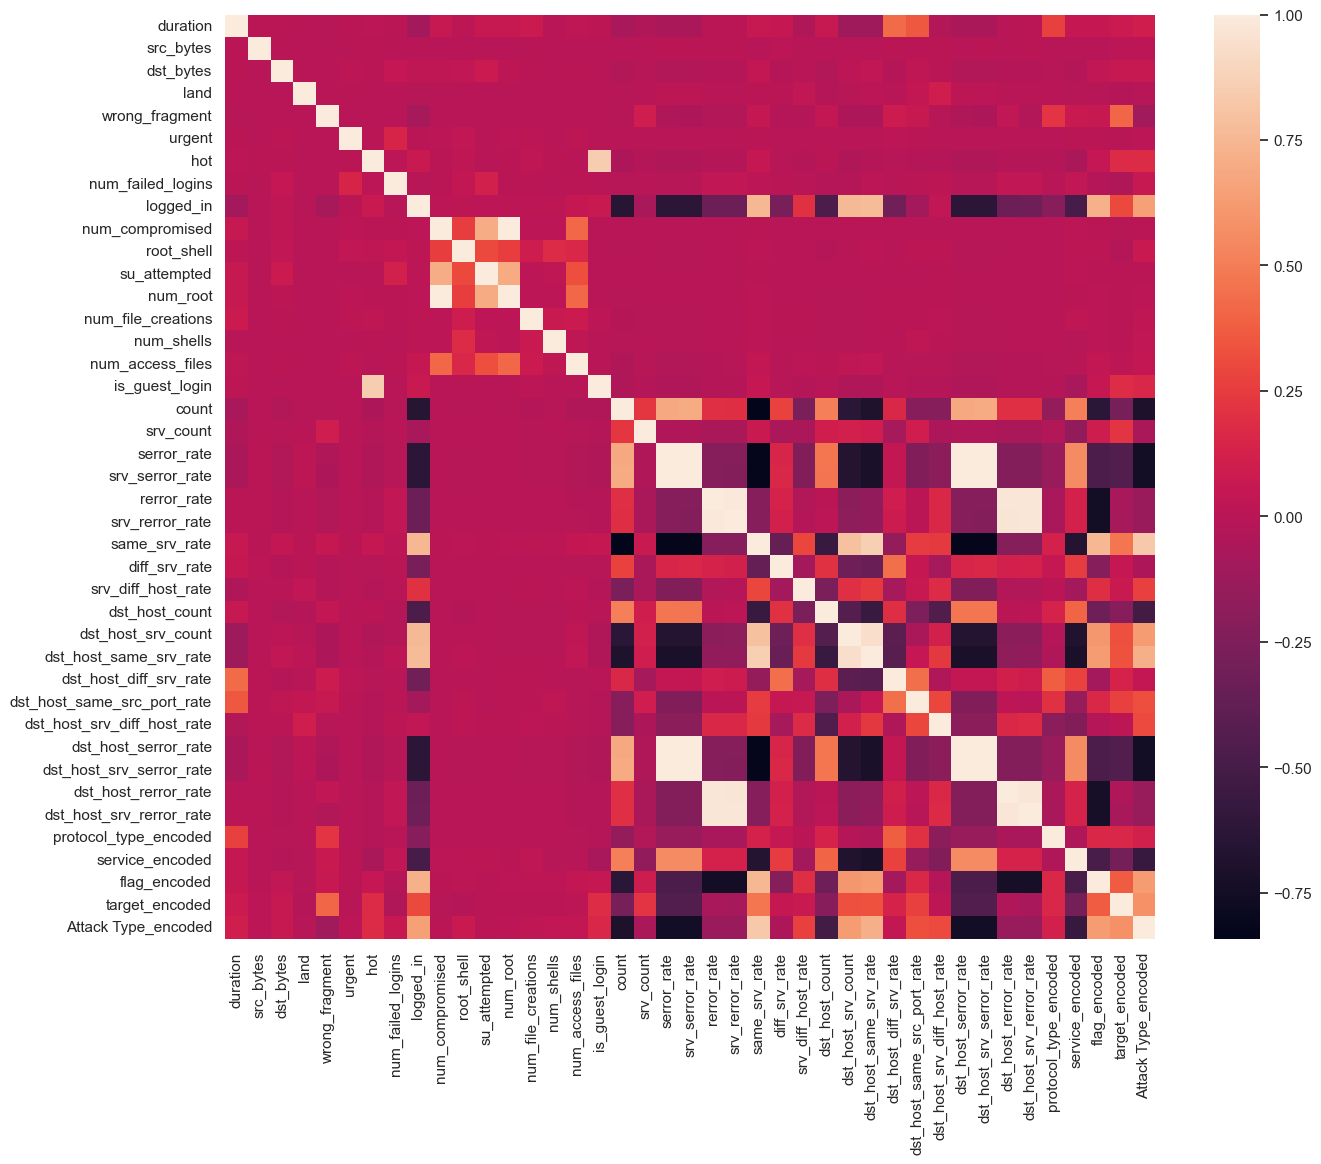

In [47]:
df = df.dropna(axis='columns')# drop columns with NaN
df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

In [48]:
# correlation coefficient between 'num_root'  and the 'num_compromised' 
df['num_root'].corr(df['num_compromised'])

0.9942146069064147

In [49]:
# correlation coefficient between 'srv_serror_rate' and 'serror_rate' 
df['srv_serror_rate'].corr(df['serror_rate'])

0.9963627548287103

In [50]:
# Correlation values
correlation_dict = {}

for col1 in df.columns:
    for col2 in df.columns:
        if df.columns.get_loc(col1) < df.columns.get_loc(col2):
            correlation = df[col1].corr(df[col2])
            correlation_dict[f'{col1}---{col2}'] = correlation

# Descending order
sorted_correlation_dict = {k: v for k, v in sorted(correlation_dict.items(), key=lambda item: item[1], reverse=True)}
sorted_correlation_dict

{'srv_serror_rate---dst_host_srv_serror_rate': 0.9983509795964999,
 'serror_rate---dst_host_serror_rate': 0.9968427313716586,
 'serror_rate---srv_serror_rate': 0.9963627548287103,
 'dst_host_serror_rate---dst_host_srv_serror_rate': 0.9958977350060628,
 'serror_rate---dst_host_srv_serror_rate': 0.9951521034735613,
 'srv_serror_rate---dst_host_serror_rate': 0.9951224321913453,
 'num_compromised---num_root': 0.9942146069064147,
 'rerror_rate---srv_rerror_rate': 0.9913169525713,
 'rerror_rate---dst_host_rerror_rate': 0.9755139232818189,
 'srv_rerror_rate---dst_host_srv_rerror_rate': 0.9751047687986009,
 'rerror_rate---dst_host_srv_rerror_rate': 0.9726142096064013,
 'dst_host_rerror_rate---dst_host_srv_rerror_rate': 0.9715011333749467,
 'srv_rerror_rate---dst_host_rerror_rate': 0.9673749564724576,
 'dst_host_srv_count---dst_host_same_srv_rate': 0.9365191648908969,
 'same_srv_rate---dst_host_same_srv_rate': 0.8583961573374825,
 'hot---is_guest_login': 0.8500538853274408,
 'same_srv_rate---At

In [51]:
#These variables are highly correlated and should be ignored for analysis.
#(Correlation = 0.9938277978738366 with num_compromised)
df.drop('num_root',axis = 1,inplace = True)

#(Correlation = 0.9983615072725952 with serror_rate)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#(Correlation = 0.9947309539817937 with rerror_rate)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#(Correlation = 0.9993041091850098 with srv_serror_rate)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#(Correlation = 0.9869947924956001 with rerror_rate)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#(Correlation = 0.9821663427308375 with srv_rerror_rate)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#(Correlation = 0.9851995540751249 with rerror_rate)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#(Correlation = 0.9736854572953938 with dst_host_srv_count)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [52]:
df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,protocol_type_encoded,service_encoded,flag_encoded,target_encoded,Attack Type_encoded
0,0,181,5450,0,0,0,0,0,1,0,...,9,9,0.0,0.11,0.00,1,22,9,11,1
1,0,239,486,0,0,0,0,0,1,0,...,19,19,0.0,0.05,0.00,1,22,9,11,1
2,0,235,1337,0,0,0,0,0,1,0,...,29,29,0.0,0.03,0.00,1,22,9,11,1
3,0,219,1337,0,0,0,0,0,1,0,...,39,39,0.0,0.03,0.00,1,22,9,11,1
4,0,217,2032,0,0,0,0,0,1,0,...,49,49,0.0,0.02,0.00,1,22,9,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,310,1881,0,0,0,0,0,1,0,...,86,255,0.0,0.01,0.05,1,22,9,11,1
494017,0,282,2286,0,0,0,0,0,1,0,...,6,255,0.0,0.17,0.05,1,22,9,11,1
494018,0,203,1200,0,0,0,0,0,1,0,...,16,255,0.0,0.06,0.05,1,22,9,11,1
494019,0,291,1200,0,0,0,0,0,1,0,...,26,255,0.0,0.04,0.05,1,22,9,11,1


In [53]:
df.shape

(145586, 33)

In [54]:
# écart type
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

urgent                         1.015038e-02
land                           1.171998e-02
su_attempted                   1.435444e-02
root_shell                     1.943305e-02
num_shells                     2.029761e-02
num_failed_logins              2.858542e-02
dst_host_srv_diff_host_rate    6.040967e-02
num_access_files               6.709079e-02
is_guest_login                 6.843257e-02
diff_srv_rate                  1.203955e-01
dst_host_diff_srv_rate         1.470208e-01
num_file_creations             1.775812e-01
wrong_fragment                 2.393680e-01
dst_host_same_src_port_rate    2.411234e-01
srv_diff_host_rate             2.419522e-01
rerror_rate                    3.089614e-01
protocol_type_encoded          3.101591e-01
same_srv_rate                  4.467948e-01
serror_rate                    4.529027e-01
logged_in                      4.999293e-01
Attack Type_encoded            5.484859e-01
hot                            1.426798e+00
target_encoded                 1

# Feature Mapping

In [55]:
df.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'protocol_type_encoded',
       'service_encoded', 'flag_encoded', 'target_encoded',
       'Attack Type_encoded'],
      dtype='object')

In [56]:
print(df['protocol_type_encoded'].value_counts())
print("\n")
for code, label in enumerate(le_protocol.classes_):
    print(f"Integer code: {code}, Corresponding class: {label}")

protocol_type_encoded
1    130913
2     12267
0      2406
Name: count, dtype: int64


Integer code: 0, Corresponding class: icmp
Integer code: 1, Corresponding class: tcp
Integer code: 2, Corresponding class: udp


In [57]:
print(df['service_encoded'].value_counts())
print("\n")
for code, label in enumerate(le_service.classes_):
    print(f"Integer code: {code}, Corresponding class: {label}")

service_encoded
22    62054
45    49057
50     9721
11     5425
40     4769
      ...  
1        11
58        5
41        1
57        1
46        1
Name: count, Length: 66, dtype: int64


Integer code: 0, Corresponding class: IRC
Integer code: 1, Corresponding class: X11
Integer code: 2, Corresponding class: Z39_50
Integer code: 3, Corresponding class: auth
Integer code: 4, Corresponding class: bgp
Integer code: 5, Corresponding class: courier
Integer code: 6, Corresponding class: csnet_ns
Integer code: 7, Corresponding class: ctf
Integer code: 8, Corresponding class: daytime
Integer code: 9, Corresponding class: discard
Integer code: 10, Corresponding class: domain
Integer code: 11, Corresponding class: domain_u
Integer code: 12, Corresponding class: echo
Integer code: 13, Corresponding class: eco_i
Integer code: 14, Corresponding class: ecr_i
Integer code: 15, Corresponding class: efs
Integer code: 16, Corresponding class: exec
Integer code: 17, Corresponding class: finger
Integer co

In [58]:
print(df['flag_encoded'].value_counts())
print("\n")
for code, label in enumerate(le_flag.classes_):
    print(f"Integer code: {code}, Corresponding class: {label}")

flag_encoded
9     87459
5     42278
1     14712
2       569
4       425
6        57
10       34
7        24
3        11
8        10
0         7
Name: count, dtype: int64


Integer code: 0, Corresponding class: OTH
Integer code: 1, Corresponding class: REJ
Integer code: 2, Corresponding class: RSTO
Integer code: 3, Corresponding class: RSTOS0
Integer code: 4, Corresponding class: RSTR
Integer code: 5, Corresponding class: S0
Integer code: 6, Corresponding class: S1
Integer code: 7, Corresponding class: S2
Integer code: 8, Corresponding class: S3
Integer code: 9, Corresponding class: SF
Integer code: 10, Corresponding class: SH


In [59]:
print(df['target_encoded'].value_counts())
print("\n")
for code, label in enumerate(le_target.classes_):
    print(f"Integer code: {code}, Corresponding class: {label}")

target_encoded
11    87832
9     51820
0       968
20      918
17      906
21      893
5       651
18      641
15      416
14      206
10      158
3        53
1        30
22       20
6        19
4        12
16       10
7         9
2         8
8         7
13        4
12        3
19        2
Name: count, dtype: int64


Integer code: 0, Corresponding class: back.
Integer code: 1, Corresponding class: buffer_overflow.
Integer code: 2, Corresponding class: ftp_write.
Integer code: 3, Corresponding class: guess_passwd.
Integer code: 4, Corresponding class: imap.
Integer code: 5, Corresponding class: ipsweep.
Integer code: 6, Corresponding class: land.
Integer code: 7, Corresponding class: loadmodule.
Integer code: 8, Corresponding class: multihop.
Integer code: 9, Corresponding class: neptune.
Integer code: 10, Corresponding class: nmap.
Integer code: 11, Corresponding class: normal.
Integer code: 12, Corresponding class: perl.
Integer code: 13, Corresponding class: phf.
Integer code: 14, Co

In [60]:
print(df['Attack Type_encoded'].value_counts())
print("\n")
for code, label in enumerate(le_Attack_type.classes_):
    print(f"Integer code: {code}, Corresponding class: {label}")

Attack Type_encoded
1    87832
0    54572
2     2131
3      999
4       52
Name: count, dtype: int64


Integer code: 0, Corresponding class: dos
Integer code: 1, Corresponding class: normal
Integer code: 2, Corresponding class: probe
Integer code: 3, Corresponding class: r2l
Integer code: 4, Corresponding class: u2r


# Models

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [62]:
df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,protocol_type_encoded,service_encoded,flag_encoded,target_encoded,Attack Type_encoded
0,0,181,5450,0,0,0,0,0,1,0,...,9,9,0.0,0.11,0.00,1,22,9,11,1
1,0,239,486,0,0,0,0,0,1,0,...,19,19,0.0,0.05,0.00,1,22,9,11,1
2,0,235,1337,0,0,0,0,0,1,0,...,29,29,0.0,0.03,0.00,1,22,9,11,1
3,0,219,1337,0,0,0,0,0,1,0,...,39,39,0.0,0.03,0.00,1,22,9,11,1
4,0,217,2032,0,0,0,0,0,1,0,...,49,49,0.0,0.02,0.00,1,22,9,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,310,1881,0,0,0,0,0,1,0,...,86,255,0.0,0.01,0.05,1,22,9,11,1
494017,0,282,2286,0,0,0,0,0,1,0,...,6,255,0.0,0.17,0.05,1,22,9,11,1
494018,0,203,1200,0,0,0,0,0,1,0,...,16,255,0.0,0.06,0.05,1,22,9,11,1
494019,0,291,1200,0,0,0,0,0,1,0,...,26,255,0.0,0.04,0.05,1,22,9,11,1


In [63]:
df = df.drop(['target_encoded',], axis=1)
df.shape

(145586, 32)

In [64]:
# Target variable and train set
y = df[['Attack Type_encoded']]
X = df.drop(['Attack Type_encoded',], axis=1)

# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(116468, 31) (29118, 31)
(116468, 1) (29118, 1)


#### GAUSSIAN NAIVE BAYES

In [65]:
from sklearn.naive_bayes import GaussianNB

model_GNB = GaussianNB()

model_GNB.fit(X_train, y_train.values.ravel())

y_test_pred__GNB = model_GNB.predict(X_test)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print(classification_report(y_test, y_test_pred__GNB))

cm1 = confusion_matrix(y_test, y_test_pred__GNB)
cm1

              precision    recall  f1-score   support

           0       0.56      0.98      0.71     10894
           1       0.97      0.51      0.67     17610
           2       0.08      0.04      0.05       434
           3       0.16      0.03      0.06       172
           4       0.01      0.75      0.02         8

    accuracy                           0.68     29118
   macro avg       0.36      0.46      0.30     29118
weighted avg       0.80      0.68      0.67     29118



array([[10656,   225,     0,     0,    13],
       [ 8051,  8998,   204,    32,   325],
       [  285,    52,    18,     0,    79],
       [   75,     3,    11,     6,    77],
       [    0,     2,     0,     0,     6]], dtype=int64)

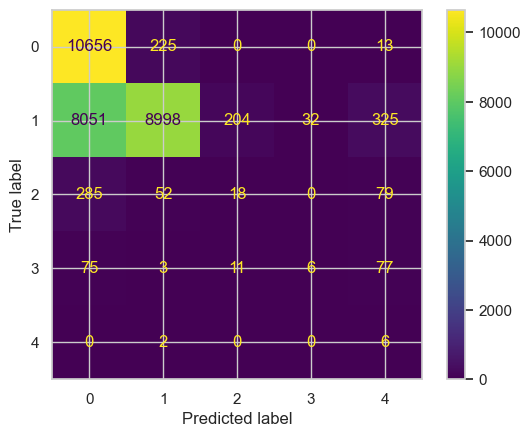

In [67]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()

[ 9317 13730 18144 22557 26971 31384 35798 40211 44625 49038 53452 57865
 62279 66692 71106 75519 79933 84346 88760 93174]


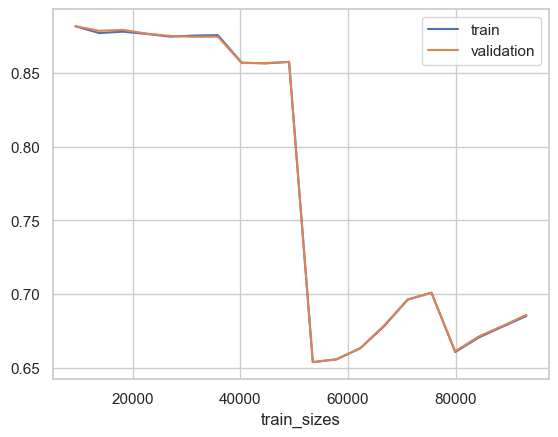

In [68]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model_GNB, X_train, y_train.values.ravel(),
                                           train_sizes=np.linspace(0.1, 1.0, 20), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

#### SGDClassifier

In [69]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(loss='hinge', alpha=0.0001, max_iter=1200000, random_state=42)

sgd_classifier.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
y_test_pred_SGD = sgd_classifier.predict(X_test)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print(classification_report(y_test, y_test_pred_SGD))

cm4 = confusion_matrix(y_test, y_test_pred_SGD)
cm4

              precision    recall  f1-score   support

           0       0.97      0.42      0.59     10894
           1       0.47      0.30      0.37     17610
           2       0.01      0.15      0.03       434
           3       0.00      0.00      0.00       172
           4       0.00      0.62      0.00         8

    accuracy                           0.34     29118
   macro avg       0.29      0.30      0.20     29118
weighted avg       0.65      0.34      0.44     29118



C:\Users\YOUNES CHAOUI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\YOUNES CHAOUI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\YOUNES CHAOUI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[4568, 5770,  383,    0,  173],
       [   0, 5273, 4198,    0, 8139],
       [ 142,  226,   65,    0,    1],
       [   0,    8,  109,    0,   55],
       [   0,    3,    0,    0,    5]], dtype=int64)

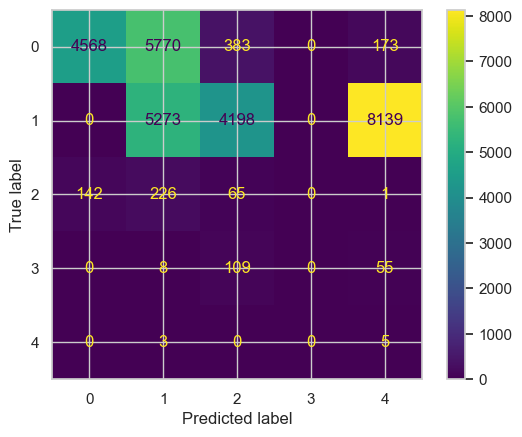

In [71]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm4)
disp.plot()

[ 9317 13730 18144 22557 26971 31384 35798 40211 44625 49038 53452 57865
 62279 66692 71106 75519 79933 84346 88760 93174]


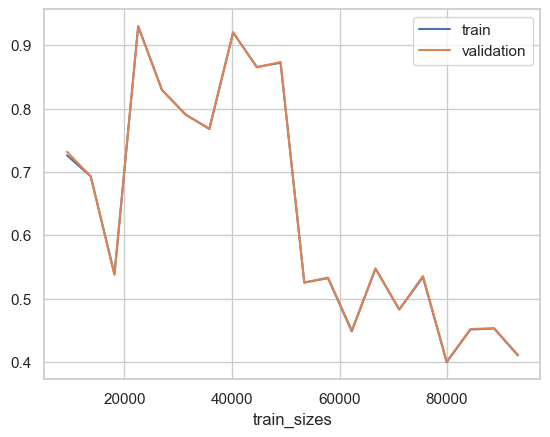

In [72]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(sgd_classifier, X_train, y_train.values.ravel(),
                                           train_sizes=np.linspace(0.1, 1.0, 20), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

#### LOGISTIC REGRESSION

In [73]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(max_iter=1200000, multi_class='ovr')

model_LR.fit(X_train, y_train.values.ravel())

y_test_pred_LR = model_LR.predict(X_test)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print(classification_report(y_test, y_test_pred_LR))

cm2 = confusion_matrix(y_test, y_test_pred_LR)
cm2

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     10894
           1       0.96      1.00      0.98     17610
           2       0.27      0.01      0.02       434
           3       0.29      0.01      0.02       172
           4       1.00      0.38      0.55         8

    accuracy                           0.96     29118
   macro avg       0.70      0.47      0.51     29118
weighted avg       0.95      0.96      0.95     29118



array([[10473,   421,     0,     0,     0],
       [   61, 17544,     0,     5,     0],
       [  220,   210,     4,     0,     0],
       [   35,   124,    11,     2,     0],
       [    1,     4,     0,     0,     3]], dtype=int64)

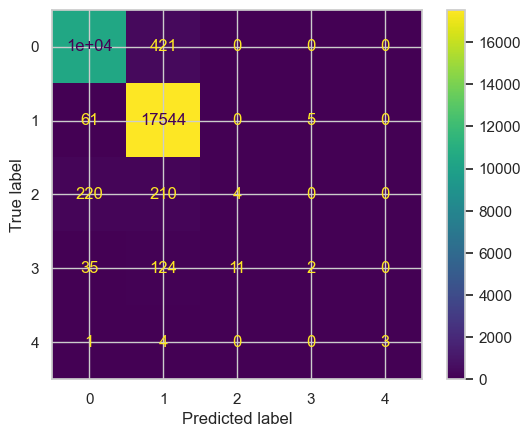

In [75]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()

#### DECISION TREE

In [76]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

model_DT.fit(X_train, y_train.values.ravel())

y_test_pred_DT = model_DT.predict(X_test)

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print(classification_report(y_test, y_test_pred_DT))

cm3 = confusion_matrix(y_test, y_test_pred_DT)
cm3

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     10894
           1       0.97      1.00      0.98     17610
           2       0.91      0.39      0.55       434
           3       0.25      0.01      0.02       172
           4       0.00      0.00      0.00         8

    accuracy                           0.98     29118
   macro avg       0.62      0.48      0.51     29118
weighted avg       0.97      0.98      0.97     29118



C:\Users\YOUNES CHAOUI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\YOUNES CHAOUI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\YOUNES CHAOUI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[10744,   150,     0,     0,     0],
       [   34, 17556,    16,     4,     0],
       [   11,   252,   171,     0,     0],
       [    0,   170,     0,     2,     0],
       [    0,     5,     1,     2,     0]], dtype=int64)

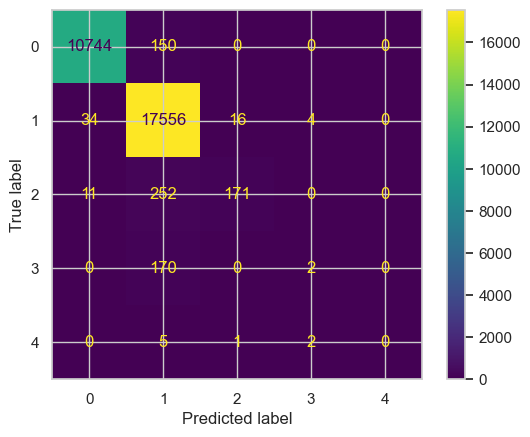

In [78]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot()

[ 9317 13730 18144 22557 26971 31384 35798 40211 44625 49038 53452 57865
 62279 66692 71106 75519 79933 84346 88760 93174]


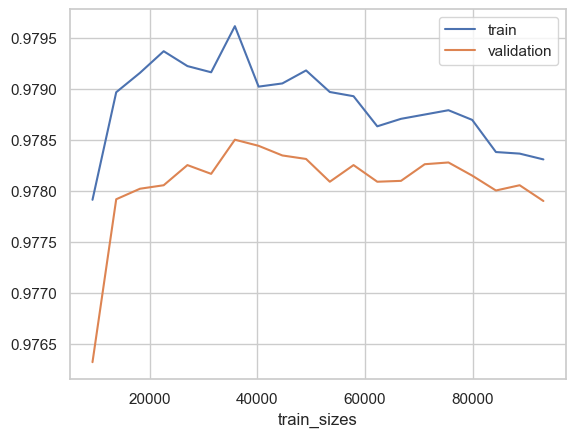

In [79]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model_DT, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1.0, 20), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [80]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [81]:
# X_minmax = MinMaxScaler().fit_transform(X_train)

# plt.scatter(X_train[:, 2], X_train[:, 3])
# plt.scatter(X_minmax[:, 2], X_minmax[:, 3])
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
model_GNB_scaled = GaussianNB()

model_GNB_scaled.fit(X_train_scaled, y_train.values.ravel())

y_test_pred__GNB_scaled = model_GNB_scaled.predict(X_test_scaled)

In [83]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print(classification_report(y_test, y_test_pred__GNB_scaled))

cm1_scaled = confusion_matrix(y_test, y_test_pred__GNB_scaled)
cm1_scaled

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     10894
           1       0.99      0.71      0.83     17610
           2       0.11      1.00      0.19       434
           3       0.34      0.46      0.39       172
           4       0.01      0.75      0.01         8

    accuracy                           0.81     29118
   macro avg       0.48      0.78      0.48     29118
weighted avg       0.96      0.81      0.87     29118



array([[10592,   183,    88,     1,    30],
       [  509, 12524,  3592,   153,   832],
       [    0,     0,   434,     0,     0],
       [    4,     2,     5,    79,    82],
       [    0,     1,     0,     1,     6]], dtype=int64)

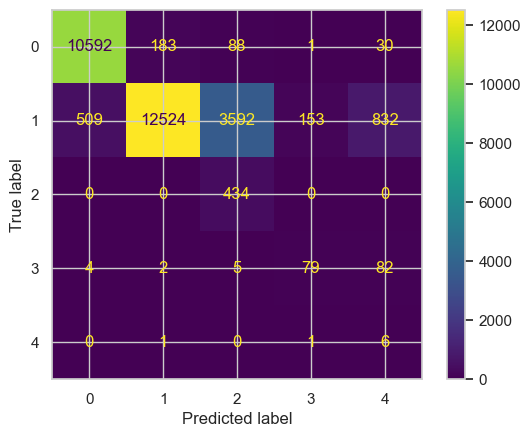

In [84]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm1_scaled)
disp.plot()

[ 9317 13730 18144 22557 26971 31384 35798 40211 44625 49038 53452 57865
 62279 66692 71106 75519 79933 84346 88760 93174]


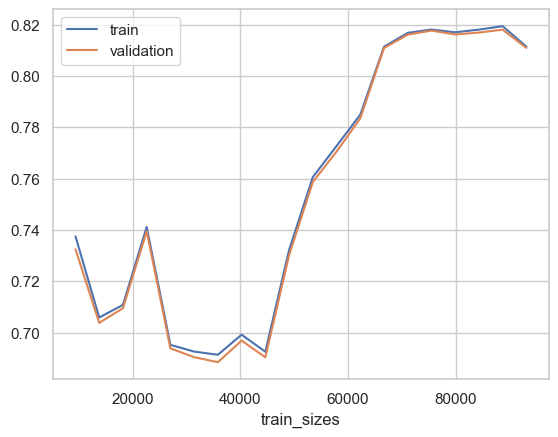

In [85]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model_GNB_scaled, X_train_scaled, y_train.values.ravel(),
                                           train_sizes=np.linspace(0.1, 1.0, 20), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

#### SGS classifier after scaling

In [86]:
from sklearn.linear_model import SGDClassifier

sgd_classifier_scaled = SGDClassifier(loss='hinge', alpha=0.0001, max_iter=1200000, random_state=42)

sgd_classifier_scaled.fit(X_train_scaled, y_train.values.ravel())

# Make predictions on the test set
y_test_pred_SGD_scaled = sgd_classifier_scaled.predict(X_test_scaled)

In [87]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print(classification_report(y_test, y_test_pred_SGD_scaled))

cm4_scaled = confusion_matrix(y_test, y_test_pred_SGD_scaled)
cm4_scaled

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     10894
           1       0.98      1.00      0.99     17610
           2       0.98      0.76      0.85       434
           3       0.81      0.50      0.62       172
           4       0.00      0.00      0.00         8

    accuracy                           0.98     29118
   macro avg       0.75      0.65      0.69     29118
weighted avg       0.98      0.98      0.98     29118



C:\Users\YOUNES CHAOUI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\YOUNES CHAOUI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\YOUNES CHAOUI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[10660,   231,     3,     0,     0],
       [   25, 17563,     4,    18,     0],
       [   13,    92,   329,     0,     0],
       [    2,    84,     0,    86,     0],
       [    1,     5,     0,     2,     0]], dtype=int64)

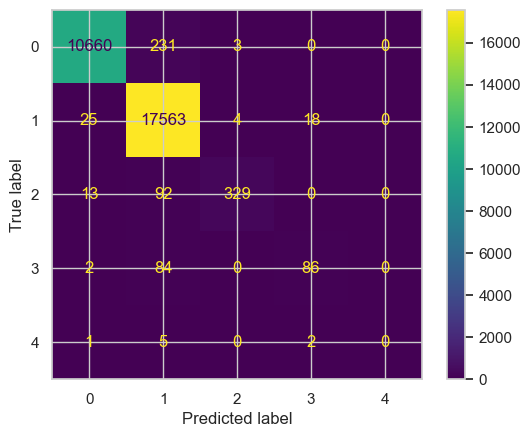

In [88]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm4_scaled)
disp.plot()

[ 9317 13730 18144 22557 26971 31384 35798 40211 44625 49038 53452 57865
 62279 66692 71106 75519 79933 84346 88760 93174]


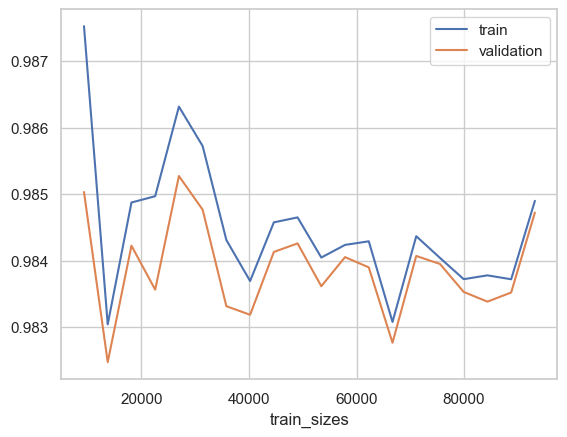

In [89]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(sgd_classifier_scaled, X_train_scaled, y_train.values.ravel(),
                                           train_sizes=np.linspace(0.1, 1.0, 20), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()